In [2]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

577

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | araguacu
Processing Record 3 of Set 1 | canico
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | luderitz
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | barahona
Processing Record 10 of Set 1 | blonduos
City not found. Skipping...
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | ambulu
Processing Record 16 of Set 1 | maine-soroa
Processing Record 17 of Set 1 | tunduru
City not found. Skipping...
Processing Record 18 of Set 1 | arhus
Processing Record 19 of Set 1 | miyako
Processing Record 20 of Set 1 | chilca
Processing Record 21 of Set 1 | tuatapere
Processing Record 22 o

Processing Record 38 of Set 4 | muncar
Processing Record 39 of Set 4 | paramirim
Processing Record 40 of Set 4 | namibe
Processing Record 41 of Set 4 | coruripe
Processing Record 42 of Set 4 | manbij
Processing Record 43 of Set 4 | port lincoln
Processing Record 44 of Set 4 | kirakira
Processing Record 45 of Set 4 | manaure
Processing Record 46 of Set 4 | touros
Processing Record 47 of Set 4 | ornskoldsvik
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | dalhousie
Processing Record 50 of Set 4 | shillong
Processing Record 1 of Set 5 | paka
Processing Record 2 of Set 5 | finschhafen
Processing Record 3 of Set 5 | mrirt
City not found. Skipping...
Processing Record 4 of Set 5 | smyrna
Processing Record 5 of Set 5 | kulhudhuffushi
Processing Record 6 of Set 5 | rumoi
Processing Record 7 of Set 5 | vysokogornyy
Processing Record 8 of Set 5 | isangel
Processing Record 9 of Set 5 | qostanay
Processing Record 10 of Set 5 | abnub
Processing Record 11 of Set 5 | smidov

Processing Record 25 of Set 8 | wamba
Processing Record 26 of Set 8 | moose factory
Processing Record 27 of Set 8 | purpe
Processing Record 28 of Set 8 | kununurra
Processing Record 29 of Set 8 | polis
Processing Record 30 of Set 8 | marawi
Processing Record 31 of Set 8 | puerto cabezas
Processing Record 32 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 33 of Set 8 | saint-augustin
Processing Record 34 of Set 8 | anadyr
Processing Record 35 of Set 8 | itaiba
Processing Record 36 of Set 8 | rio grande
Processing Record 37 of Set 8 | alofi
Processing Record 38 of Set 8 | bowen
Processing Record 39 of Set 8 | terrace
Processing Record 40 of Set 8 | sur
Processing Record 41 of Set 8 | fayaoue
Processing Record 42 of Set 8 | zhigansk
Processing Record 43 of Set 8 | asau
Processing Record 44 of Set 8 | sabang
Processing Record 45 of Set 8 | praia
Processing Record 46 of Set 8 | pousat
City not found. Skipping...
Processing Record 47 of Set 8 | tasbuget
City not found. Sk

Processing Record 14 of Set 12 | lexington park
Processing Record 15 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 12 | kyshtovka
Processing Record 17 of Set 12 | hohhot
Processing Record 18 of Set 12 | aksarka
Processing Record 19 of Set 12 | zwedru
Processing Record 20 of Set 12 | virden
Processing Record 21 of Set 12 | maku
Processing Record 22 of Set 12 | broome
Processing Record 23 of Set 12 | lebyazhye
Processing Record 24 of Set 12 | daru
Processing Record 25 of Set 12 | cata
Processing Record 26 of Set 12 | jinhua
Processing Record 27 of Set 12 | nokaneng
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,84.09,36,8,0.92,AU,2021-12-04 04:19:27
1,Araguacu,-12.9306,-49.8264,73.96,92,100,1.01,BR,2021-12-04 04:19:28
2,Canico,32.6333,-16.8500,65.03,78,75,1.99,PT,2021-12-04 04:19:28
3,Bredasdorp,-34.5322,20.0403,59.29,75,100,10.29,ZA,2021-12-04 04:19:29
4,Luderitz,-26.6481,15.1594,60.42,78,80,12.68,NA,2021-12-04 04:19:29
5,New Norfolk,-42.7826,147.0587,58.91,40,91,7.00,AU,2021-12-04 04:19:29
6,Arraial Do Cabo,-22.9661,-42.0278,70.86,78,3,1.61,BR,2021-12-04 04:19:30
7,Ilulissat,69.2167,-51.1000,12.22,57,75,26.46,GL,2021-12-04 04:19:30
8,Barahona,18.2085,-71.1008,76.73,84,99,0.22,DO,2021-12-04 04:19:31
9,Jamestown,42.0970,-79.2353,35.19,86,90,5.01,US,2021-12-04 04:19:31


In [11]:
#Reformat DataFrame
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-12-04 04:19:27,-33.6500,115.3333,84.09,36,8,0.92
1,Araguacu,BR,2021-12-04 04:19:28,-12.9306,-49.8264,73.96,92,100,1.01
2,Canico,PT,2021-12-04 04:19:28,32.6333,-16.8500,65.03,78,75,1.99
3,Bredasdorp,ZA,2021-12-04 04:19:29,-34.5322,20.0403,59.29,75,100,10.29
4,Luderitz,NA,2021-12-04 04:19:29,-26.6481,15.1594,60.42,78,80,12.68
5,New Norfolk,AU,2021-12-04 04:19:29,-42.7826,147.0587,58.91,40,91,7.00
6,Arraial Do Cabo,BR,2021-12-04 04:19:30,-22.9661,-42.0278,70.86,78,3,1.61
7,Ilulissat,GL,2021-12-04 04:19:30,69.2167,-51.1000,12.22,57,75,26.46
8,Barahona,DO,2021-12-04 04:19:31,18.2085,-71.1008,76.73,84,99,0.22
9,Jamestown,US,2021-12-04 04:19:31,42.0970,-79.2353,35.19,86,90,5.01


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

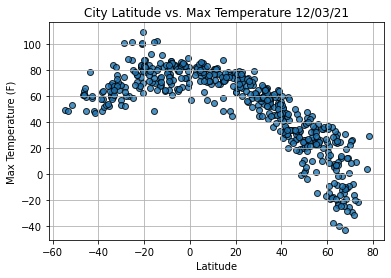

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

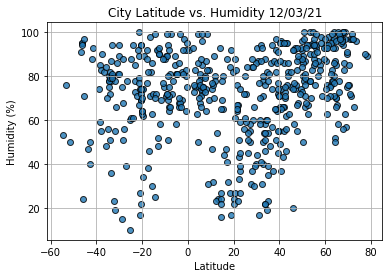

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

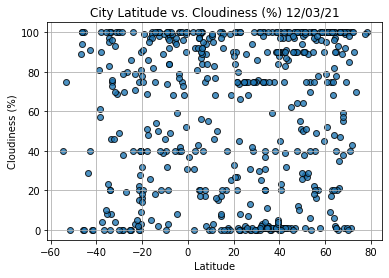

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

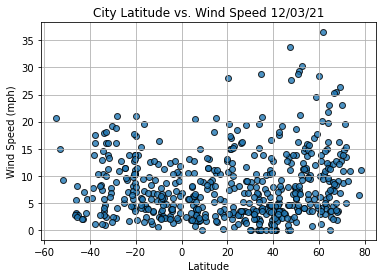

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Canico,PT,2021-12-04 04:19:28,32.6333,-16.8500,65.03,78,75,1.99
7,Ilulissat,GL,2021-12-04 04:19:30,69.2167,-51.1000,12.22,57,75,26.46
8,Barahona,DO,2021-12-04 04:19:31,18.2085,-71.1008,76.73,84,99,0.22
9,Jamestown,US,2021-12-04 04:19:31,42.0970,-79.2353,35.19,86,90,5.01
11,Nanortalik,GL,2021-12-04 04:19:32,60.1432,-45.2371,34.41,93,100,28.41
...,...,...,...,...,...,...,...,...,...
520,Maku,IR,2021-12-04 04:33:56,39.2911,44.4521,33.12,45,4,3.24
521,Broome,US,2021-12-04 04:33:57,42.2506,-75.8330,33.84,71,90,3.00
522,Lebyazhye,RU,2021-12-04 04:33:57,55.2689,66.4947,23.31,94,18,9.51
524,Cata,RO,2021-12-04 04:33:58,46.0833,25.2667,34.02,92,90,2.19


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

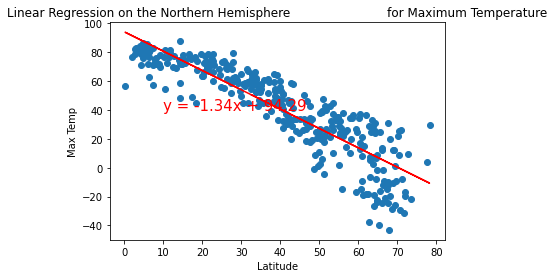

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


In [60]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

-0.8867986476158817

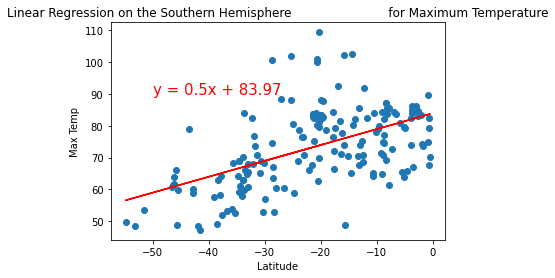

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [69]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

0.532441148696614

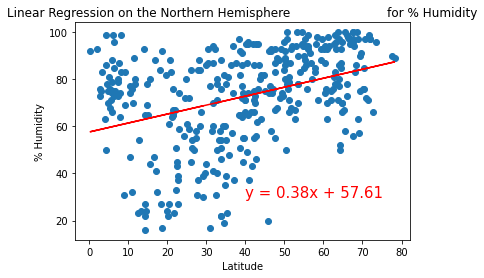

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,30))

In [71]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

0.3703994845562517

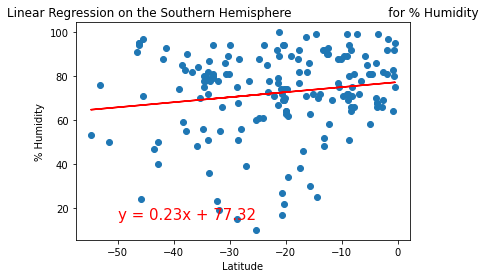

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [73]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

0.15628456652829034

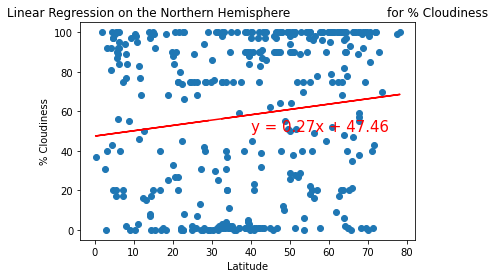

In [74]:
# Linear regression on the Northern Hemisphere %Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,50))

In [75]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

0.13764153428649445

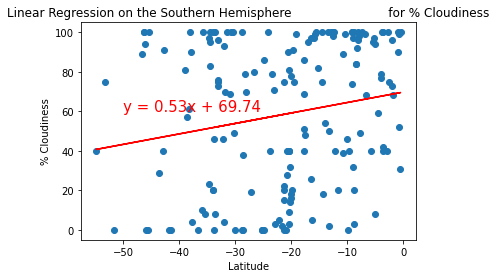

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [77]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

0.18946183388100038

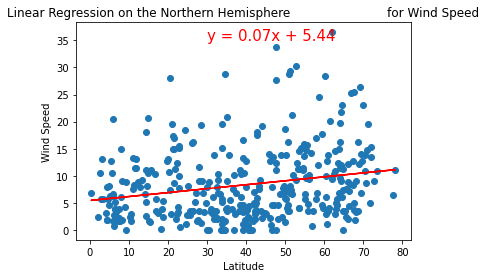

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,35))

In [79]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

0.22031144710944295

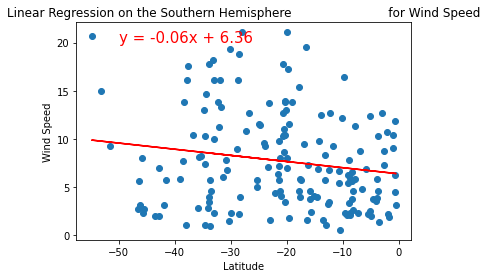

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))

In [81]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

-0.1678921301870956